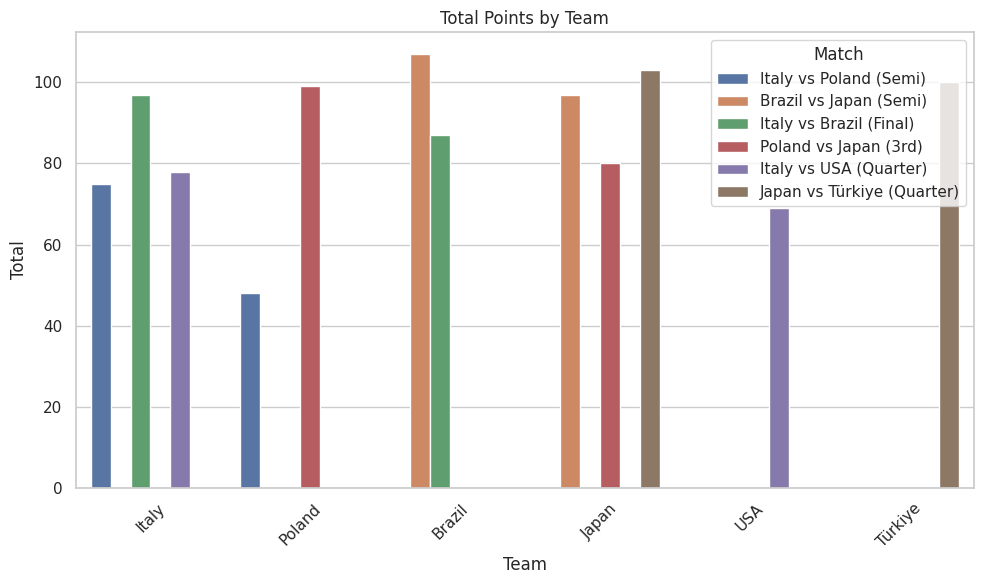

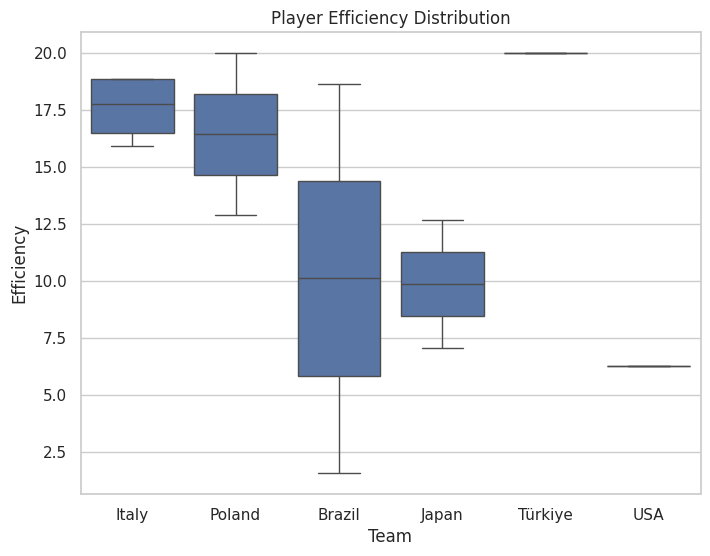

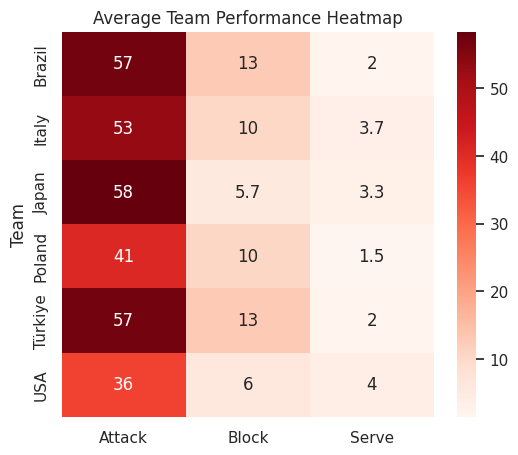

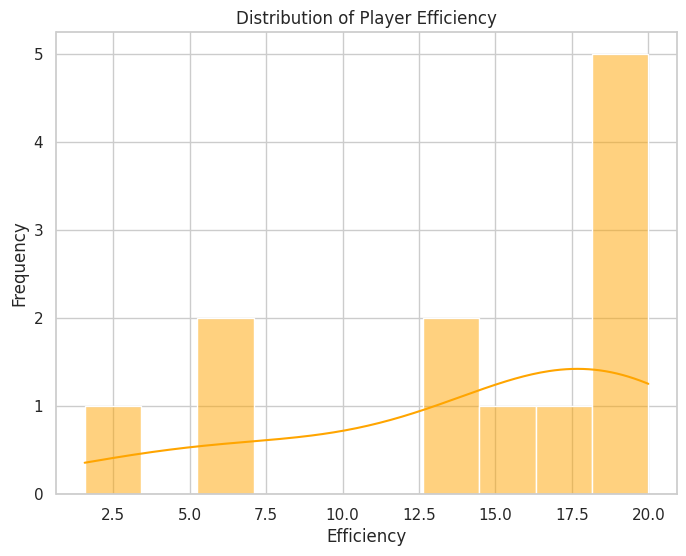

✅ All tables, charts and Excel file created successfully!

--- Machine Learning Results ---
Mean Squared Error (MSE): 46.471
R² Score: -0.651


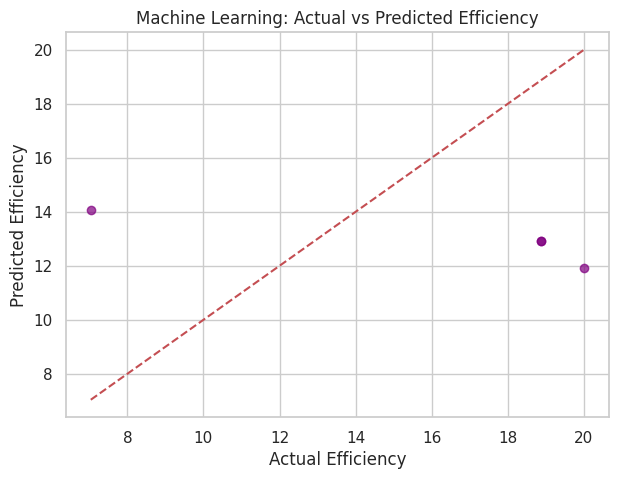

In [8]:
# ===============================
# IMPORTS
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# TEAM STATS DATA
# ===============================
team_data = [
    ["Italy vs Poland (Semi)", "Italy", "Poland", "W", 51, 11, 3, 10, 75],
    ["Italy vs Poland (Semi)", "Poland", "Italy", "L", 30, 6, 1, 11, 48],

    ["Brazil vs Japan (Semi)", "Brazil", "Japan", "W", 69, 14, 2, 22, 107],
    ["Brazil vs Japan (Semi)", "Japan", "Brazil", "L", 62, 9, 3, 23, 97],

    ["Italy vs Brazil (Final)", "Italy", "Brazil", "W", 58, 14, 3, 22, 97],
    ["Italy vs Brazil (Final)", "Brazil", "Italy", "L", 45, 12, 2, 28, 87],

    ["Poland vs Japan (3rd)", "Poland", "Japan", "W", 52, 15, 2, 30, 99],
    ["Poland vs Japan (3rd)", "Japan", "Poland", "L", 52, 2, 2, 24, 80],

    ["Italy vs USA (Quarter)", "Italy", "USA", "W", 50, 6, 5, 17, 78],
    ["Italy vs USA (Quarter)", "USA", "Italy", "L", 36, 6, 4, 23, 69],

    ["Japan vs Türkiye (Quarter)", "Japan", "Türkiye", "W", 61, 6, 5, 31, 103],
    ["Japan vs Türkiye (Quarter)", "Türkiye", "Japan", "L", 57, 13, 2, 28, 100],
]

team_df = pd.DataFrame(team_data, columns=[
    "Match", "Team", "Opponent", "Result",
    "Attack", "Block", "Serve", "Opponent Error", "Total"
])

# ===============================
# PLAYER STATS DATA
# ===============================
player_data = [
    ["Italy vs Poland", "Italy", "Egonu", "O", 17, 1, 2, 18.87],
    ["Italy vs Poland", "Italy", "Danesi", "MB", 6, 2, 0, 16.67],
    ["Italy vs Poland", "Poland", "Korneluk", "MB", 11, 5, 0, 12.90],
    ["Italy vs Poland", "Poland", "Smarzek", "O", 9, 1, 1, 20.00],

    ["Brazil vs Japan", "Brazil", "Gabi", "OH", 25, 1, 0, 18.67],
    ["Brazil vs Japan", "Japan", "Wada", "OH", 20, 1, 0, 12.70],

    ["Italy vs Brazil", "Italy", "Antropova", "O", 18, 1, 1, 15.91],
    ["Italy vs Brazil", "Brazil", "Gabi", "OH", 15, 4, 1, 1.56],

    ["Japan vs Türkiye", "Japan", "Ishikawa", "OH", 19, 0, 2, 7.04],
    ["Japan vs Türkiye", "Türkiye", "Vargas", "O", 22, 3, 0, 20.00],

    ["Italy vs USA", "Italy", "Egonu", "O", 17, 1, 2, 18.87],
    ["Italy vs USA", "USA", "Skinner", "OH", 11, 0, 0, 6.25],
]

player_df = pd.DataFrame(player_data, columns=[
    "Match", "Team", "Player", "Position",
    "Attack Points", "Block Points", "Serve Points", "Efficiency"
])

# ===============================
# 📊 VISUALIZATIONS
# ===============================

# --- BAR CHART ---
plt.figure(figsize=(10,6))
sns.barplot(data=team_df, x="Team", y="Total", hue="Match")
plt.title("Total Points by Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- BOX PLOT ---
plt.figure(figsize=(8,6))
sns.boxplot(data=player_df, x="Team", y="Efficiency")
plt.title("Player Efficiency Distribution")
plt.show()

# --- HEATMAP ---
pivot = team_df.pivot_table(index="Team", values=["Attack", "Block", "Serve"], aggfunc="mean")
plt.figure(figsize=(6,5))
sns.heatmap(pivot, annot=True, cmap="Reds")
plt.title("Average Team Performance Heatmap")
plt.show()

# --- HISTOGRAM (NEW) ---
plt.figure(figsize=(8,6))
sns.histplot(player_df["Efficiency"], bins=10, kde=True, color="orange")
plt.title("Distribution of Player Efficiency")
plt.xlabel("Efficiency")
plt.ylabel("Frequency")
plt.show()

# ===============================
# EXPORT TO EXCEL
# ===============================
with pd.ExcelWriter("VNL_Analysis.xlsx") as writer:
    team_df.to_excel(writer, sheet_name="Team_Stats", index=False)
    player_df.to_excel(writer, sheet_name="Player_Stats", index=False)

print("✅ All tables, charts and Excel file created successfully!")

# ===============================
# MACHINE LEARNING (ONLY ADDITION)
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = player_df[["Attack Points", "Block Points", "Serve Points"]]
y = player_df["Efficiency"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\n--- Machine Learning Results ---")
print("Mean Squared Error (MSE):", round(mean_squared_error(y_test, y_pred), 3))
print("R² Score:", round(r2_score(y_test, y_pred), 3))

# ===============================
# ML VISUALIZATION
# ===============================
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color="purple", alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("Actual Efficiency")
plt.ylabel("Predicted Efficiency")
plt.title("Machine Learning: Actual vs Predicted Efficiency")
plt.grid(True)
plt.show()



# Yeni Bölüm